# ploting the loss curves
## exploring the dlloger file

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def parse_log(file_path,save_key="average_loss",next_key='step_loss'):
    
    new_file_path = f"{Path(file_path).resolve().parents[0]}/{save_key}.csv"
    new_file_path = str(new_file_path)
    lines = []
    with open(file_path,"r") as f:
        # skipping the first 7 lines
        for _ in range(7+1):
            next(f)
        lines = f.readlines()
        for i,line in enumerate(lines):
            lines[i] = line[4:]
    with open(new_file_path,"w") as f:
        for i, line in enumerate(lines):
            if save_key in line:
                s = line.find(save_key) + (len(save_key)+2)
                e = line.find(next_key) - 4
                f.writelines(line[s:e+1].strip()+',\n')
    return new_file_path

In [3]:
def get_data(file_path,sub_sample):
    data = pd.read_csv(file_path,header=None)
    y = data[0]
    if y.dtype == 'object':
        y = y.str.replace("e","")
    y = y.to_numpy().astype(float)
    if sub_sample and sub_sample !=1:
        idx = np.arange(0,y.size,sub_sample)
        y = y[idx]
    x = np.arange(1,y.size+1)
    assert x.shape == y.shape, f"x shape:{x.shape} vs y shape {y.shape}"
    return x,y

In [4]:
def create_plot(x,y,labels,plot_name,style='fivethirtyeight', line_width = 2,xytext=(20,10),pres=2):
    # configurations for plot
    plt.style.use("seaborn")
    plt.style.use(style)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(plot_name)
    
    # actual ploting
    plt.plot(x,y, label=labels[1], linewidth=line_width)
    
    # select 10 equally spaced points on plot
    point_index = np.linspace(0,x.shape[0]-1,10).astype(int)
    # plot them
    plt.plot(x[point_index], y[point_index],  'o')
    # annotate the values
    for xitem,yitem in np.nditer([x[point_index], y[point_index]]):
        etiqueta = f"{np.around(yitem,pres)}"
        plt.annotate(etiqueta, (xitem,yitem), textcoords="offset points",xytext=xytext,ha="center")
    
    # show the plot.
    plt.tight_layout()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()  

In [5]:
def get_plot(log_path, labels, plot_name, sub_sample=None, save_key="average_loss",next_key='step_loss',
             style='fivethirtyeight', line_width = 0.5,xytext=(20,10),pres=2):
    
    parsed_file = parse_log(log_path,save_key=save_key, next_key=next_key)
    x, y = get_data(parsed_file,sub_sample)
    create_plot(x,y,labels,plot_name,style=style, line_width = line_width,xytext=xytext,pres=pres)    

## BERT Large

---
### Phase 1

In [6]:
dir_name = Path('results/bert_large_lamb_pretraining/2021_12_24_02_33_51').resolve()
file_path = str(dir_name/"dllogger_phase1.json")
file_path

'/home/acd13471fa/karthik/code/DeepLearningExamples/PyTorch/LanguageModeling/BERT/results/bert_large_lamb_pretraining/2021_12_24_02_33_51/dllogger_phase1.json'

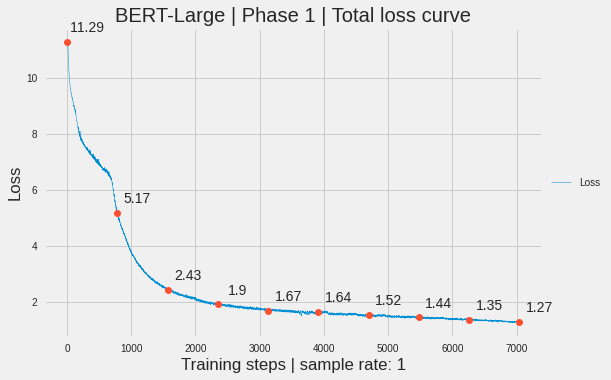

In [7]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-Large | Phase 1 | Total loss curve', sub_sample=sample_rate,
         save_key="average_loss",next_key='step_loss')

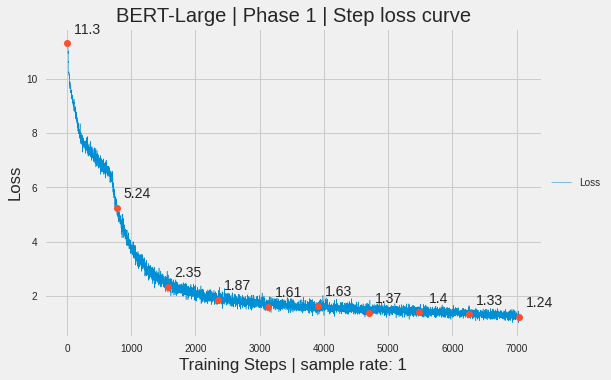

In [8]:
sample_rate = 1
get_plot(file_path,labels=[f'Training Steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-Large | Phase 1 | Step loss curve',sub_sample=sample_rate, 
         save_key="step_loss",next_key='learning_rate')

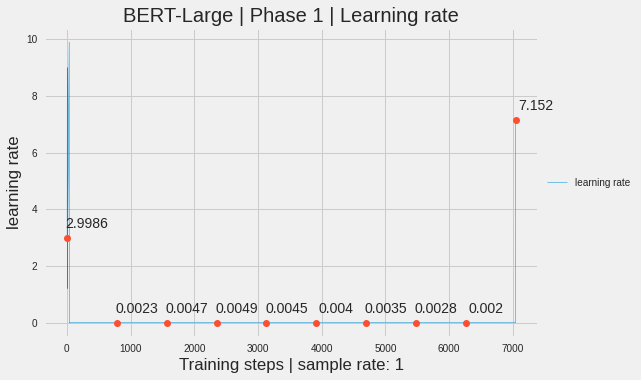

In [9]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"learning rate"],
         plot_name='BERT-Large | Phase 1 | Learning rate', sub_sample=sample_rate,
         save_key="learning_rate",next_key='}',pres=4)

--- 
### phase 2

In [10]:
file_path = str(dir_name/"dllogger_phase2.json")
file_path

'/home/acd13471fa/karthik/code/DeepLearningExamples/PyTorch/LanguageModeling/BERT/results/bert_large_lamb_pretraining/2021_12_24_02_33_51/dllogger_phase2.json'

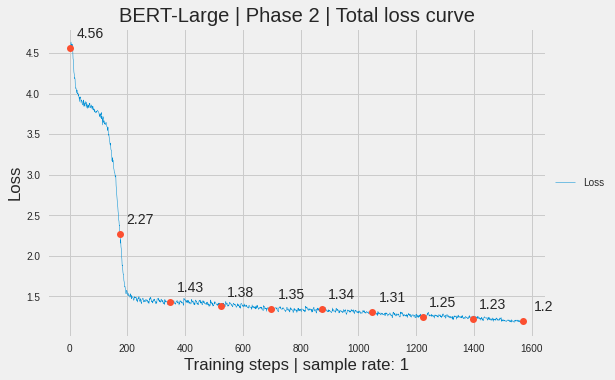

In [11]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-Large | Phase 2 | Total loss curve', sub_sample=sample_rate,
         save_key="average_loss",next_key='step_loss')

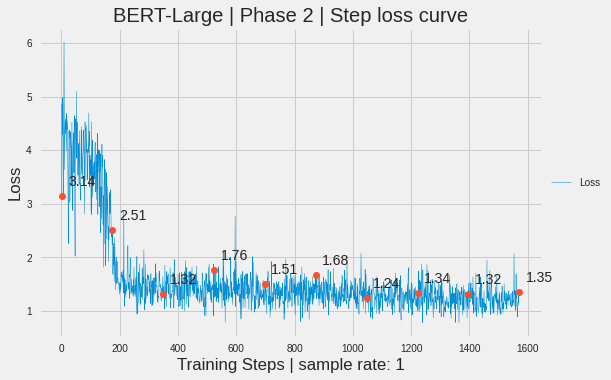

In [12]:
sample_rate = 1
get_plot(file_path,labels=[f'Training Steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-Large | Phase 2 | Step loss curve',sub_sample=sample_rate, 
         save_key="step_loss",next_key='learning_rate')

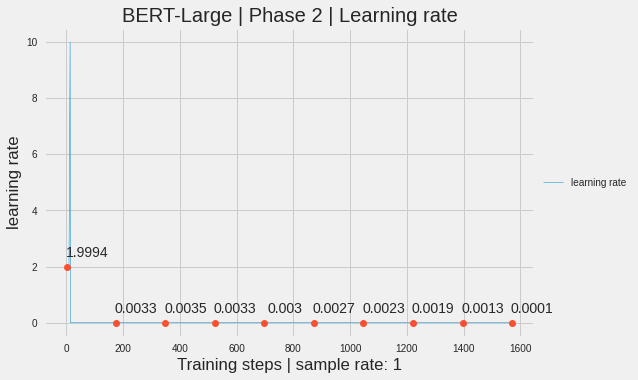

In [13]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"learning rate"],
         plot_name='BERT-Large | Phase 2 | Learning rate', sub_sample=sample_rate,
         save_key="learning_rate",next_key='}',pres=4)

## BERT base

### Phase 1

In [14]:
dir_name = Path('results/bert_base_lamb_pretraining/2021_12_24_22_04_40').resolve()
file_path = str(dir_name/"dllogger_phase1.json")
file_path

'/home/acd13471fa/karthik/code/DeepLearningExamples/PyTorch/LanguageModeling/BERT/results/bert_base_lamb_pretraining/2021_12_24_22_04_40/dllogger_phase1.json'

In [15]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-base | Phase 1 | Total loss curve', sub_sample=sample_rate,
         save_key="average_loss",next_key='step_loss')

StopIteration: 

In [ ]:
sample_rate = 1
get_plot(file_path,labels=[f'Training Steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-base | Phase 1 | Step loss curve',sub_sample=sample_rate, 
         save_key="step_loss",next_key='learning_rate')

In [ ]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"learning rate"],
         plot_name='BERT-base | Phase 1 | Learning rate', sub_sample=sample_rate,
         save_key="learning_rate",next_key='}',pres=4)

### Phase 2

In [ ]:
file_path = str(dir_name/"dllogger_phase2.json")
file_path

In [ ]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-base | Phase 1 | Total loss curve', sub_sample=sample_rate,
         save_key="average_loss",next_key='step_loss')

In [ ]:
sample_rate = 1
get_plot(file_path,labels=[f'Training Steps | sample rate: {sample_rate}',"Loss"],
         plot_name='BERT-base | Phase 1 | Step loss curve',sub_sample=sample_rate, 
         save_key="step_loss",next_key='learning_rate')

In [ ]:
sample_rate = 1
get_plot(file_path,labels=[f'Training steps | sample rate: {sample_rate}',"learning rate"],
         plot_name='BERT-base | Phase 1 | Learning rate', sub_sample=sample_rate,
         save_key="learning_rate",next_key='}',pres=4)